In [1]:
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv('/content/star_classification.csv')
df_data = df[["alpha", "delta", "u", "g", "r", "i", "z", "redshift"]]

In [3]:
df_test = df
df_test["class"] = df_test["class"].replace({'GALAXY': 1, 'QSO': 2, 'STAR': 3})

df_test["class"].value_counts()

<ipython-input-3-1779dc5efdf1>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_test["class"] = df_test["class"].replace({'GALAXY': 1, 'QSO': 2, 'STAR': 3})


,count
class,
1,59445
3,21594
2,18961


In [5]:
df_test.corrwith(df_test['class']).sort_values()

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


,0
r,-0.076766
redshift,-0.054239
fiber_ID,-0.041586
run_ID,-0.036014
obj_ID,-0.036012
field_ID,-0.034833
u,-0.024645
g,-0.020066
alpha,-0.011756
spec_obj_ID,-0.010060


In [6]:
df['class'].value_counts()

,count
class,
1,59445
3,21594
2,18961


<Axes: >

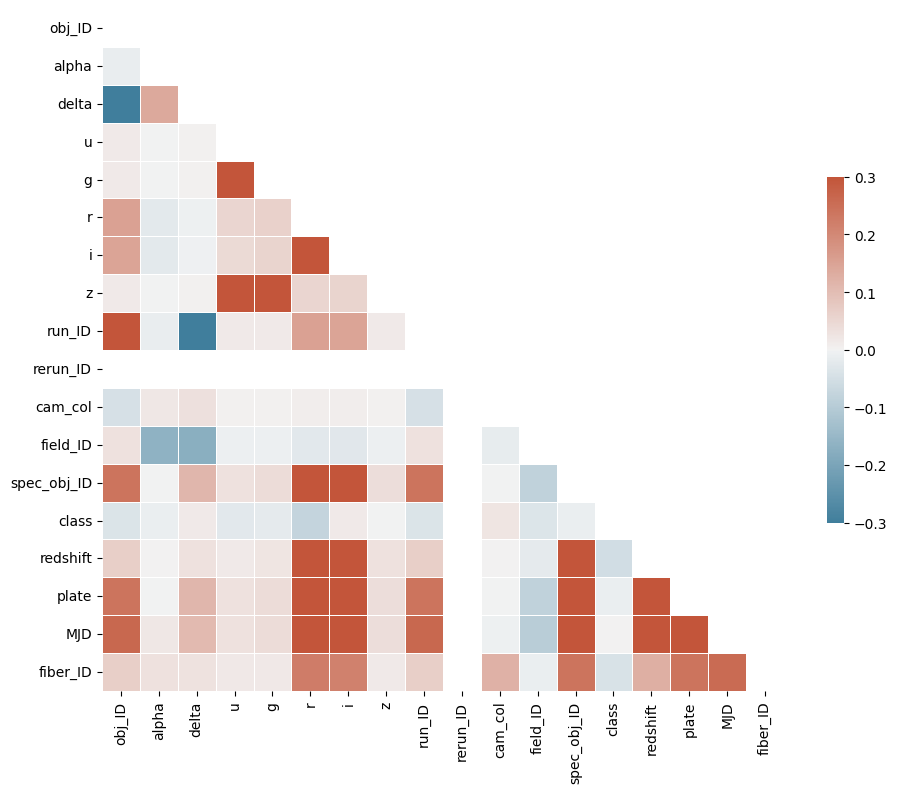

In [7]:
# Compute the correlation matrix
corr = df_test.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

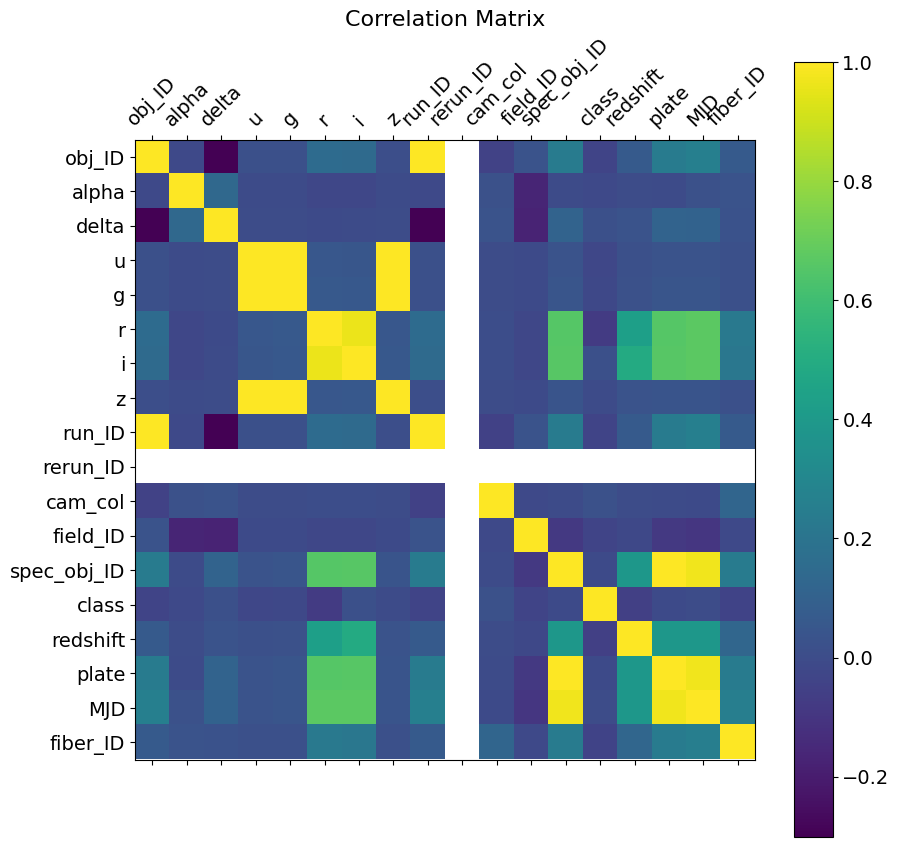

In [8]:
#https://stackoverflow.com/questions/29432629/plot-correlation-matrix-using-pandas#29432741

f = plt.figure(figsize=(10, 10))
plt.matshow(df_test.corr(), fignum=f.number)
plt.xticks(range(df_test.select_dtypes(['number']).shape[1]), df_test.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(df_test.select_dtypes(['number']).shape[1]), df_test.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

In [10]:
#convert class to numbers
df_target = df[["class"]]
df_target["class"] = df_target["class"].replace({'GALAXY': 1, 'QSO': 2, 'STAR': 3})

#divide data
split_index1 = int(0.6* len(df))
split_index2 = int(0.8* len(df))

train_inputs = df_data[:split_index1]  # First 60% for training
val_inputs = df_data[split_index1:split_index2] #next 20% validation
test_inputs = df_data[split_index2:]  #last 20% for testing

train_targets = df_target[:split_index1]
val_targets = df_target[split_index1:split_index2]
test_targets = df_target[split_index2:]

#convert to numpy array
train_input_np = train_inputs.to_numpy()
val_input_np = val_inputs.to_numpy()
test_input_np = test_inputs.to_numpy()

train_target_np = train_targets.to_numpy()
val_target_np = val_targets.to_numpy()
test_target_np = test_targets.to_numpy()

#convert to numpy stack
train_input_stack = np.vstack(train_input_np)
val_input_stack = np.vstack(val_input_np)
test_input_stack = np.vstack(test_input_np)

train_target_stack = np.vstack(train_target_np)
val_target_stack = np.vstack(val_target_np)
test_target_stack = np.vstack(test_target_np)


<ipython-input-10-91e1ee95276f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_target["class"] = df_target["class"].replace({'GALAXY': 1, 'QSO': 2, 'STAR': 3})


In [11]:
train_inputs = train_input_stack.astype(np.float32)
train_targets = train_target_stack.astype(np.float32)

val_inputs = val_input_stack.astype(np.float32)
val_targets = val_target_stack.astype(np.float32)

test_inputs = test_input_stack.astype(np.float32)
test_targets = test_target_stack.astype(np.float32)

In [12]:
df_data

,alpha,delta,u,g,r,i,z,redshift
0,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,0.634794
1,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,0.779136
2,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,0.644195
3,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,0.932346
4,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,0.116123
...,...,...,...,...,...,...,...,...
99995,39.620709,-2.594074,22.16759,22.97586,21.90404,21.30548,20.73569,0.000000
99996,29.493819,19.798874,22.69118,22.38628,20.45003,19.75759,19.41526,0.404895
99997,224.587407,15.700707,21.16916,19.26997,18.20428,17.69034,17.35221,0.143366
99998,212.268621,46.660365,25.35039,21.63757,19.91386,19.07254,18.62482,0.455040


In [13]:
(train_inputs)

array([[135.6891   ,  32.494633 ,  23.87882  , ...,  19.16573  ,
         18.79371  ,   0.6347936],
       [144.8261   ,  31.274185 ,  24.77759  , ...,  21.16812  ,
         21.61427  ,   0.779136 ],
       [142.1888   ,  35.582443 ,  25.26307  , ...,  19.34857  ,
         18.94827  ,   0.6441945],
       ...,
       [174.91995  ,  52.271618 ,  22.28294  , ...,  19.2916   ,
         18.8      ,   0.50591  ],
       [184.6338   ,  52.710712 ,  26.06024  , ...,  19.6161   ,
         19.07299  ,   0.5994404],
       [150.09737  ,   3.7487898,  24.12138  , ...,  19.59054  ,
         19.17026  ,   0.5362175]], dtype=float32)

In [15]:
df = pd.read_csv('/content/star_classification.csv')
df_data = df[["alpha", "delta", "u", "g", "r", "i", "z", "redshift"]]

#convert class to numbers
df_target = df[["class"]]
df_target["class"] = df_target["class"].replace({'GALAXY': 1, 'QSO': 2, 'STAR': 3})

#divide data
split_index1 = int(0.6* len(df))
split_index2 = int(0.8* len(df))

train_inputs = df_data[:split_index1]  # First 60% for training
val_inputs = df_data[split_index1:split_index2] #next 20% validation
test_inputs = df_data[split_index2:]  #last 20% for testing

train_targets = df_target[:split_index1]
val_targets = df_target[split_index1:split_index2]
test_targets = df_target[split_index2:]

#convert to numpy array
train_input_np = train_inputs.to_numpy()
val_input_np = val_inputs.to_numpy()
test_input_np = test_inputs.to_numpy()

train_target_np = train_targets.to_numpy()
val_target_np = val_targets.to_numpy()
test_target_np = test_targets.to_numpy()

#convert to numpy stack
train_input_stack = np.vstack(train_input_np)
val_input_stack = np.vstack(val_input_np)
test_input_stack = np.vstack(test_input_np)

train_target_stack = np.vstack(train_target_np)
val_target_stack = np.vstack(val_target_np)
test_target_stack = np.vstack(test_target_np)

# convert to floats
train_inputs = train_input_stack.astype(np.float32)
train_targets = train_target_stack.astype(np.float32)

val_inputs = val_input_stack.astype(np.float32)
val_targets = val_target_stack.astype(np.float32)

test_inputs = test_input_stack.astype(np.float32)
test_targets = test_target_stack.astype(np.float32)

<ipython-input-15-d82caba8a75c>:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_target["class"] = df_target["class"].replace({'GALAXY': 1, 'QSO': 2, 'STAR': 3})
<ipython-input-15-d82caba8a75c>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_target["class"] = df_target["class"].replace({'GALAXY': 1, 'QSO': 2, 'STAR': 3})


In [17]:
def stellar_model(intermediate_layers, layer_units, optimize, loss_function, my_epochs, batchsize):

    #define intermediate layers and layer units for model
    layers_for_model = []
    for i in range(intermediate_layers):
      layers_for_model.append(layers.Dense(layer_units, activation="relu"))

    model = keras.Sequential(layers_for_model + [layers.Dense(8, activation="softmax")])

    model.compile(optimizer=optimize,
                  loss=loss_function,
                  metrics=["accuracy"])

    history = model.fit(train_inputs, train_targets,
                        epochs=my_epochs,
                        batch_size=16,
                        validation_data = (val_inputs, val_targets))

    history_dict = history.history
    history_dict.keys()

    history_dict = history.history
    loss = history_dict["loss"]
    val_loss = history_dict["val_loss"]
    acc = history_dict["accuracy"]
    val_acc = history_dict["val_accuracy"]

    max_val_acc = max(val_acc)
    max_val_acc_epoch = np.argmax(val_acc) + 1
    print(f"Highest Validation Accuracy: {max_val_acc:.4f} at Epoch {max_val_acc_epoch}")

    min_val_loss = min(val_loss)
    min_val_loss_epoch = np.argmin(val_loss) + 1
    print(f"Lowest Validation Loss: {min_val_loss:.4f} at Epoch {min_val_loss_epoch}")

    plt.plot(acc, "bo", label="Training acc")
    plt.plot( val_acc, "b", label="Validation acc")

    plt.title("Training and validation accuracy")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.show()


    plt.plot(loss, "bo", label="Training Loss")
    plt.plot( val_loss, "b", label="Validation Loss")

    plt.title("Training and validation Loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()




### Testing the function

Epoch 1/20
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.5743 - loss: 3.4024 - val_accuracy: 0.8083 - val_loss: 0.5680
Epoch 2/20
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.8247 - loss: 0.4209 - val_accuracy: 0.9153 - val_loss: 0.4262
Epoch 3/20
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.8645 - loss: 0.3363 - val_accuracy: 0.9068 - val_loss: 0.5157
Epoch 4/20
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.8869 - loss: 0.2983 - val_accuracy: 0.8374 - val_loss: 0.7611
Epoch 5/20
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9003 - loss: 0.2770 - val_accuracy: 0.9380 - val_loss: 0.6112
Epoch 6/20
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.9105 - loss: 0.2545 - val_accuracy: 0.9384 - val_loss: 0.5697
Epoch 7/20
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9152 - loss: 0.2446 - val_accuracy: 0.8749 - val_loss: 0.7033
Epoch 8/20
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.9197 - loss: 0.2314 

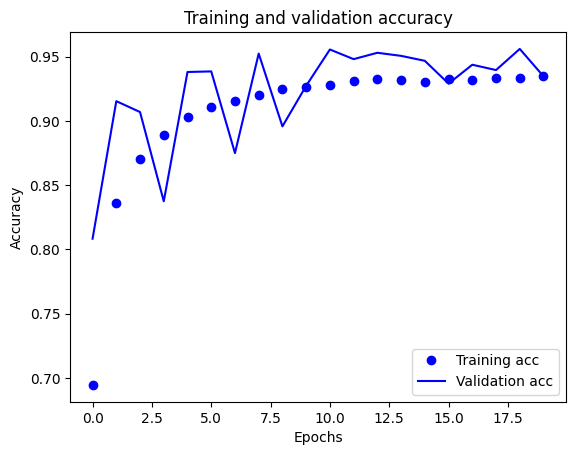

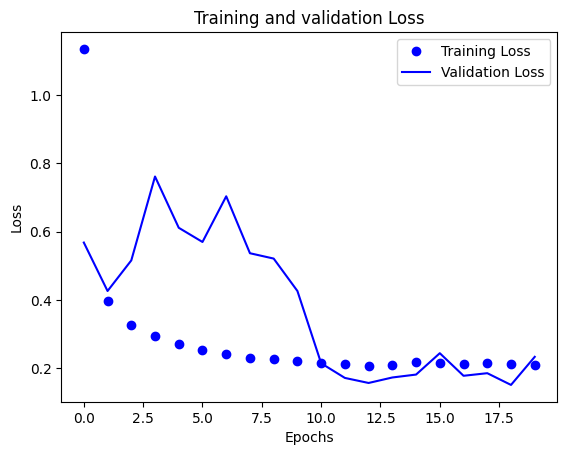

In [19]:
default = stellar_model(2, 16, "rmsprop", "sparse_categorical_crossentropy", 20, 16)
# intemediate_layers, layer_units, optimize, loss_function, my_epochs, batch size

Epoch 1/20
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.6211 - loss: 1.6124 - val_accuracy: 0.8090 - val_loss: 0.6497
Epoch 2/20
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.8285 - loss: 0.4147 - val_accuracy: 0.8666 - val_loss: 0.6371
Epoch 3/20
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.8679 - loss: 0.3332 - val_accuracy: 0.8896 - val_loss: 0.6831
Epoch 4/20
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8923 - loss: 0.2873 - val_accuracy: 0.9172 - val_loss: 0.7418
Epoch 5/20
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.9074 - loss: 0.2546 - val_accuracy: 0.9289 - val_loss: 0.7239
Epoch 6/20
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9200 - loss: 0.2294 - val_accuracy: 0.9039 - val_loss: 0.8062
Epoch 7/20
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9276 - loss: 0.2151 - val_accuracy: 0.9376 - val_loss: 0.7589
Epoch 8/20
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - accuracy: 0.9314 - loss: 0.203

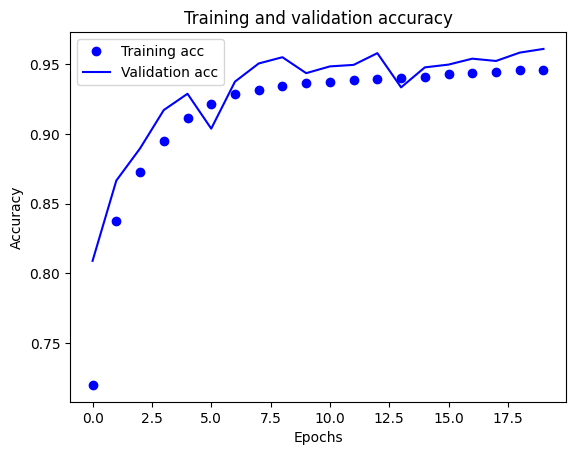

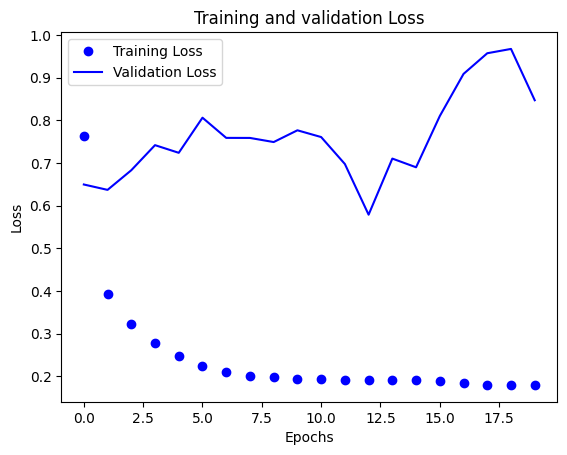

In [20]:
#1 dense Layer
stellar_model(1, 32, "rmsprop", "sparse_categorical_crossentropy", 20, 64)
# intemediate_layers, layer_units, optimize, loss_function, my_epochs, batch size

Epoch 1/7
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.6396 - loss: 0.8563 - val_accuracy: 0.8418 - val_loss: 0.6139
Epoch 2/7
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.8158 - loss: 0.4270 - val_accuracy: 0.8408 - val_loss: 0.5741
Epoch 3/7
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.8649 - loss: 0.3344 - val_accuracy: 0.8417 - val_loss: 0.6395
Epoch 4/7
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8850 - loss: 0.2949 - val_accuracy: 0.9406 - val_loss: 0.4824
Epoch 5/7
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.9060 - loss: 0.2565 - val_accuracy: 0.9276 - val_loss: 0.2291
Epoch 6/7
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.9171 - loss: 0.2362 - val_accuracy: 0.9413 - val_loss: 0.1878
Epoch 7/7
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.9198 - loss: 0.2249 - val_accuracy: 0.9280 - val_loss: 0.2235
Highest Validation Accuracy: 0.9413 at Epoch 6
Lowest Validation Loss: 0.1878 at Epoch 6


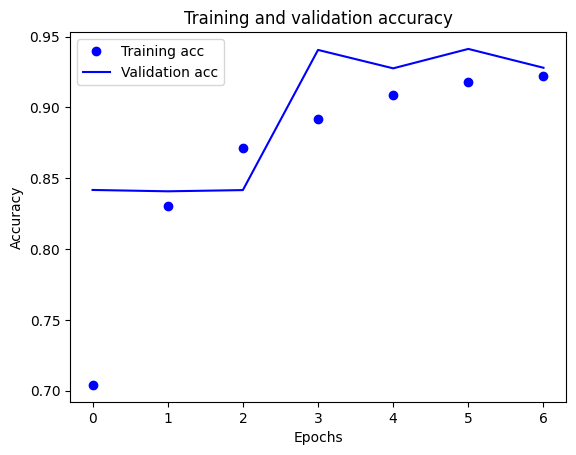

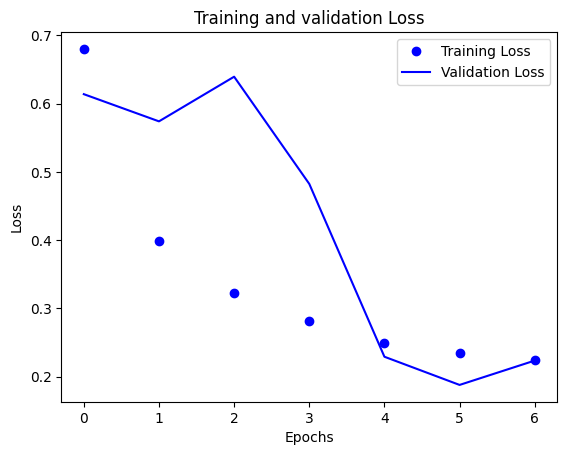

In [21]:
#3 dense Layers
stellar_model(3, 16, "rmsprop", "sparse_categorical_crossentropy", 7, 16)
# intemediate_layers, layer_units, optimize, loss_function, my_epochs, batch size

Epoch 1/20
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.6167 - loss: 1.1811 - val_accuracy: 0.7683 - val_loss: 0.6969
Epoch 2/20
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.7964 - loss: 0.4679 - val_accuracy: 0.8176 - val_loss: 0.6467
Epoch 3/20
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.8537 - loss: 0.3532 - val_accuracy: 0.8367 - val_loss: 0.6460
Epoch 4/20
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.8801 - loss: 0.3083 - val_accuracy: 0.9143 - val_loss: 0.5740
Epoch 5/20
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.8930 - loss: 0.2850 - val_accuracy: 0.8739 - val_loss: 0.5715
Epoch 6/20
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.8997 - loss: 0.2668 - val_accuracy: 0.9331 - val_loss: 0.1968
Epoch 7/20
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.9083 - loss: 0.2537 - val_accuracy: 0.9455 - val_loss: 0.1836
Epoch 8/20
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.9173 - loss: 0.239

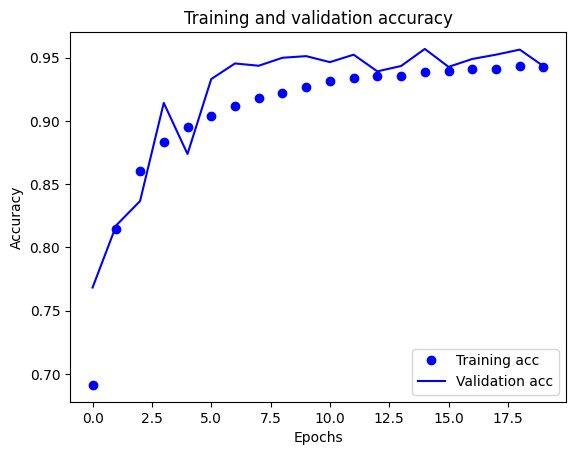

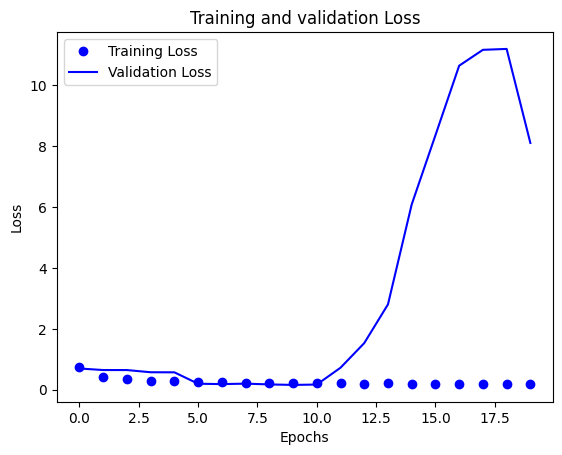

In [22]:
#4 dense Layers
stellar_model(4, 16, "rmsprop", "sparse_categorical_crossentropy", 20, 16)
# intemediate_layers, layer_units, optimize, loss_function, my_epochs, batch size

Epoch 1/20
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.5086 - loss: 1.4002 - val_accuracy: 0.6417 - val_loss: 0.9615
Epoch 2/20
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.6822 - loss: 0.7278 - val_accuracy: 0.8464 - val_loss: 0.6441
Epoch 3/20
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.8327 - loss: 0.3949 - val_accuracy: 0.8980 - val_loss: 0.5733
Epoch 4/20
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.8671 - loss: 0.3285 - val_accuracy: 0.9252 - val_loss: 0.2616
Epoch 5/20
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.8851 - loss: 0.2874 - val_accuracy: 0.8996 - val_loss: 0.2621
Epoch 6/20
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9051 - loss: 0.2547 - val_accuracy: 0.9287 - val_loss: 0.2152
Epoch 7/20
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9129 - loss: 0.2476 - val_accuracy: 0.9382 - val_loss: 0.1852
Epoch 8/20
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9159 - loss: 0.2435 

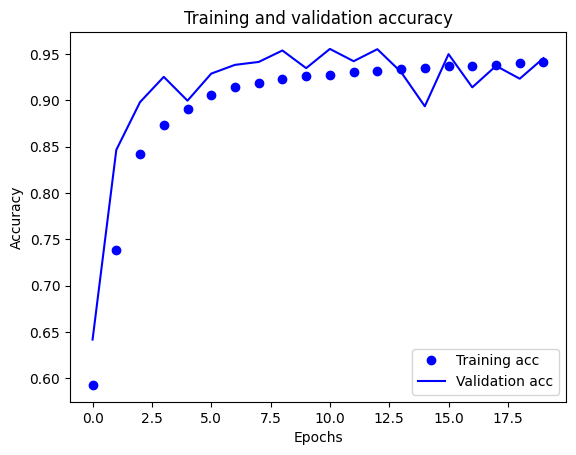

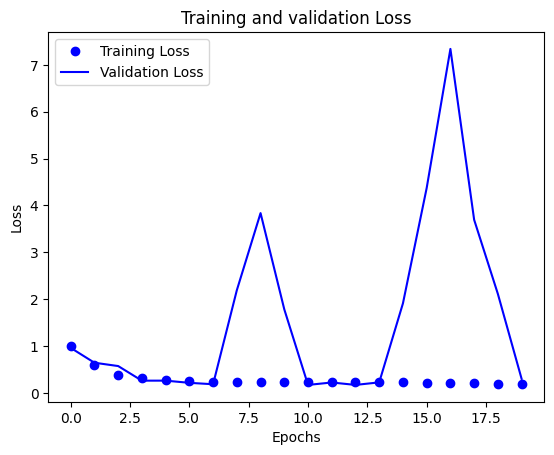

In [23]:
#5 dense Layers
stellar_model(5, 16, "rmsprop", "sparse_categorical_crossentropy", 20, 16)
# intemediate_layers, layer_units, optimize, loss_function, my_epochs, batch size

Epoch 1/20
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.5653 - loss: 1.2522 - val_accuracy: 0.6342 - val_loss: 0.8437
Epoch 2/20
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.6726 - loss: 0.7782 - val_accuracy: 0.7774 - val_loss: 0.5805
Epoch 3/20
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.7681 - loss: 0.5756 - val_accuracy: 0.7879 - val_loss: 0.6635
Epoch 4/20
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.7863 - loss: 0.5354 - val_accuracy: 0.8464 - val_loss: 0.4854
Epoch 5/20
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8694 - loss: 0.3418 - val_accuracy: 0.8606 - val_loss: 0.4624
Epoch 6/20
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.9056 - loss: 0.2616 - val_accuracy: 0.9105 - val_loss: 0.4200
Epoch 7/20
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9251 - loss: 0.2177 - val_accuracy: 0.9250 - val_loss: 0.4222
Epoch 8/20
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.9334 - loss: 0.1970 - 

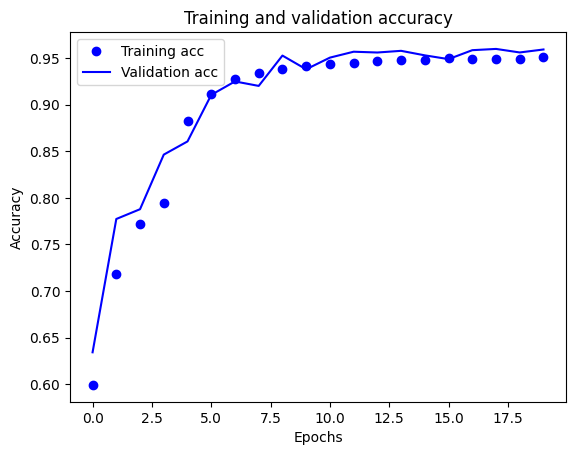

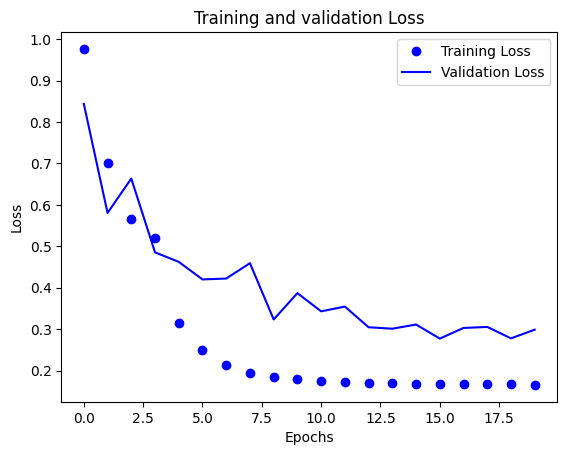

In [24]:
#8 unit Layers
stellar_model(2, 8, "rmsprop", "sparse_categorical_crossentropy", 20, 16)
# intemediate_layers, layer_units, optimize, loss_function, my_epochs, batch size

Epoch 1/7
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.5760 - loss: 1.2047 - val_accuracy: 0.8158 - val_loss: 0.4013
Epoch 2/7
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.7927 - loss: 0.4820 - val_accuracy: 0.8569 - val_loss: 0.3527
Epoch 3/7
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.8595 - loss: 0.3493 - val_accuracy: 0.9132 - val_loss: 0.2461
Epoch 4/7
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8922 - loss: 0.2833 - val_accuracy: 0.9186 - val_loss: 0.2342
Epoch 5/7
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9078 - loss: 0.2573 - val_accuracy: 0.9389 - val_loss: 0.1969
Epoch 6/7
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.9217 - loss: 0.2359 - val_accuracy: 0.9499 - val_loss: 0.1711
Epoch 7/7
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9264 - loss: 0.2279 - val_accuracy: 0.9395 - val_loss: 0.2181
Highest Validation Accuracy: 0.9499 at Epoch 6
Lowest Validation Loss: 0.1711 at Epoch 6


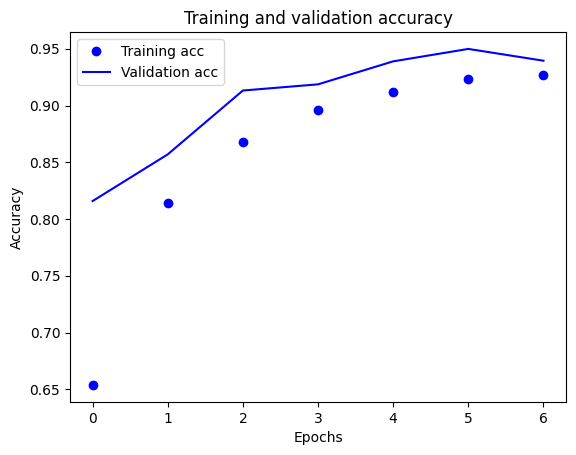

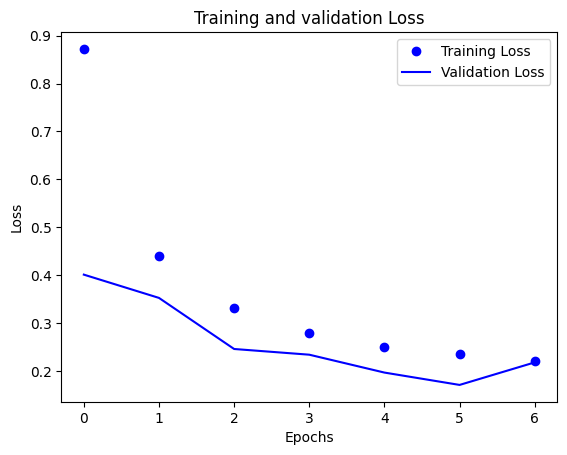

In [25]:
#32 unit Layers
stellar_model(2, 32, "rmsprop", "sparse_categorical_crossentropy", 7, 16)
# intemediate_layers, layer_units, optimize, loss_function, my_epochs, batch size

Epoch 1/20
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.6224 - loss: 1.1039 - val_accuracy: 0.8874 - val_loss: 0.3304
Epoch 2/20
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.8416 - loss: 0.3800 - val_accuracy: 0.8204 - val_loss: 0.3869
Epoch 3/20
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8868 - loss: 0.2969 - val_accuracy: 0.9211 - val_loss: 0.2184
Epoch 4/20
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.9043 - loss: 0.2690 - val_accuracy: 0.9183 - val_loss: 0.2245
Epoch 5/20
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9159 - loss: 0.2450 - val_accuracy: 0.9086 - val_loss: 0.2516
Epoch 6/20
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9247 - loss: 0.2259 - val_accuracy: 0.9495 - val_loss: 0.1670
Epoch 7/20
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.9322 - loss: 0.2135 - val_accuracy: 0.9555 - val_loss: 0.1583
Epoch 8/20
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9313 - loss: 0.2168 

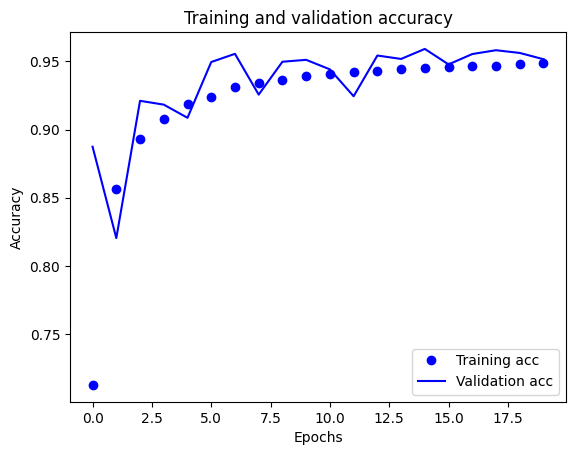

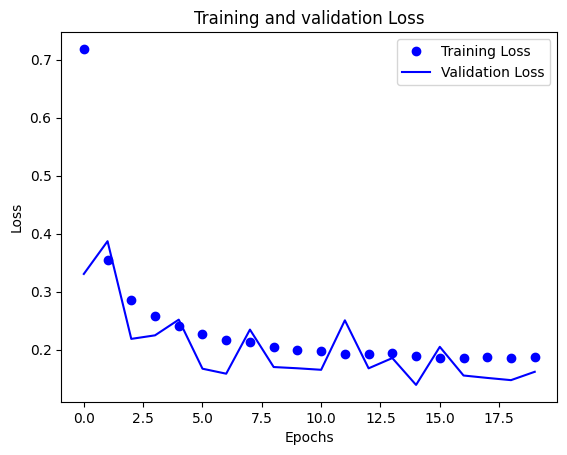

In [40]:
#64 unit Layers
stellar_model(2, 64, "rmsprop", "sparse_categorical_crossentropy", 20, 16)
# intemediate_layers, layer_units, optimize, loss_function, my_epochs, batch size

Epoch 1/20
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.6181 - loss: 1.6108 - val_accuracy: 0.7996 - val_loss: 0.3926
Epoch 2/20
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.8302 - loss: 0.4031 - val_accuracy: 0.8112 - val_loss: 0.3654
Epoch 3/20
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.8723 - loss: 0.3282 - val_accuracy: 0.8616 - val_loss: 0.2829
Epoch 4/20
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.8988 - loss: 0.2742 - val_accuracy: 0.7761 - val_loss: 0.4955
Epoch 5/20
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.9099 - loss: 0.2514 - val_accuracy: 0.9443 - val_loss: 0.1745
Epoch 6/20
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.9191 - loss: 0.2354 - val_accuracy: 0.9416 - val_loss: 0.1748
Epoch 7/20
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9260 - loss: 0.2151 - val_accuracy: 0.9467 - val_loss: 0.1613
Epoch 8/20
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.9297 - loss: 0.21

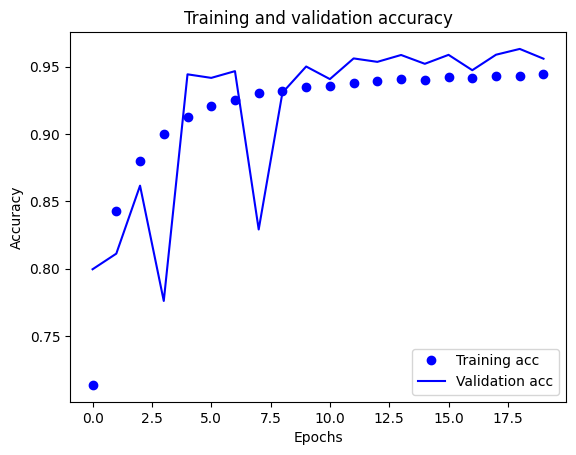

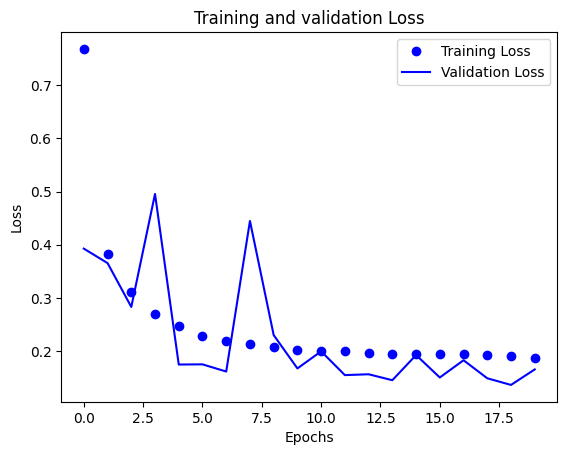

In [27]:
#64 unit Layers
#1 Intermediate Layer
stellar_model(1, 64, "rmsprop", "sparse_categorical_crossentropy", 20, 16)
# intemediate_layers, layer_units, optimize, loss_function, my_epochs, batch size

Epoch 1/30
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.6288 - loss: 1.3209 - val_accuracy: 0.8389 - val_loss: 0.3472
Epoch 2/30
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.8294 - loss: 0.4129 - val_accuracy: 0.8567 - val_loss: 0.3214
Epoch 3/30
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.8747 - loss: 0.3275 - val_accuracy: 0.7736 - val_loss: 0.4515
Epoch 4/30
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.9013 - loss: 0.2764 - val_accuracy: 0.9252 - val_loss: 0.2123
Epoch 5/30
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.9158 - loss: 0.2474 - val_accuracy: 0.8067 - val_loss: 0.4130
Epoch 6/30
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.9199 - loss: 0.2320 - val_accuracy: 0.9398 - val_loss: 0.1795
Epoch 7/30
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9285 - loss: 0.2124 - val_accuracy: 0.9558 - val_loss: 0.1509
Epoch 8/30
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.9320 - loss: 0.2063

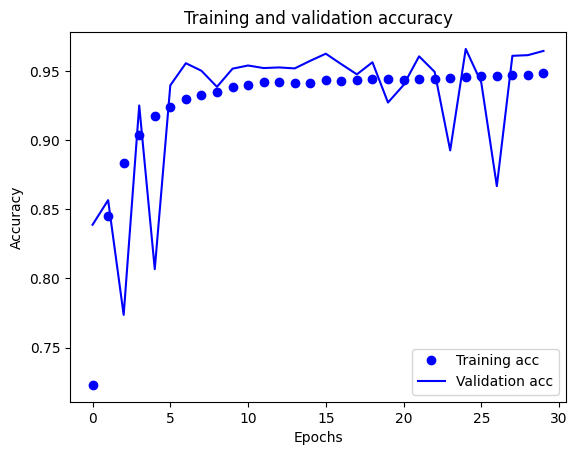

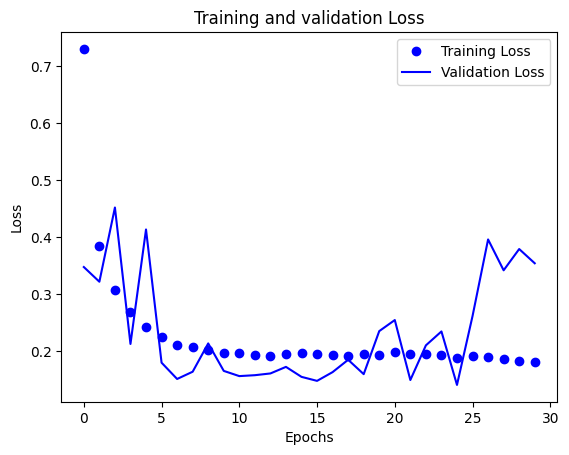

In [41]:
#64 unit Layers
#1 Intermediate Layer
stellar_model(1, 64, "rmsprop", "sparse_categorical_crossentropy", 30, 16)
# intemediate_layers, layer_units, optimize, loss_function, my_epochs, batch size

Epoch 1/7
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.6117 - loss: 1.6630 - val_accuracy: 0.8772 - val_loss: 0.3145
Epoch 2/7
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.8536 - loss: 0.3567 - val_accuracy: 0.8846 - val_loss: 0.3010
Epoch 3/7
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.8980 - loss: 0.2791 - val_accuracy: 0.9214 - val_loss: 0.2225
Epoch 4/7
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9178 - loss: 0.2409 - val_accuracy: 0.9412 - val_loss: 0.1886
Epoch 5/7
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9239 - loss: 0.2257 - val_accuracy: 0.9446 - val_loss: 0.1677
Epoch 6/7
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.9298 - loss: 0.2166 - val_accuracy: 0.9424 - val_loss: 0.1913
Epoch 7/7
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.9341 - loss: 0.2094 - val_accuracy: 0.9369 - val_loss: 0.2377


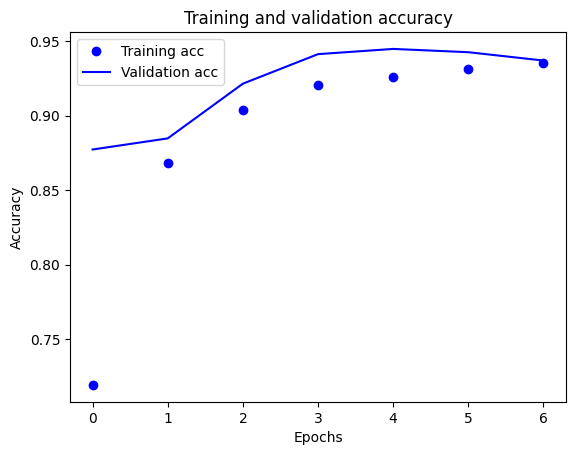

Highest Validation Accuracy:  0.9446499943733215


In [ ]:
#128 unit Layers
stellar_model(2, 128, "rmsprop", "sparse_categorical_crossentropy", 7, 16)
# intemediate_layers, layer_units, optimize, loss_function, my_epochs, batch size

Epoch 1/7
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.5938 - loss: 1.5304 - val_accuracy: 0.6205 - val_loss: 0.9878
Epoch 2/7
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.6145 - loss: 0.9139 - val_accuracy: 0.6348 - val_loss: 0.9179
Epoch 3/7
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.6242 - loss: 0.8546 - val_accuracy: 0.6562 - val_loss: 0.8210
Epoch 4/7
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.6442 - loss: 0.8141 - val_accuracy: 0.6958 - val_loss: 0.8379
Epoch 5/7
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.6613 - loss: 0.7739 - val_accuracy: 0.7356 - val_loss: 0.9028
Epoch 6/7
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.6757 - loss: 0.7455 - val_accuracy: 0.6964 - val_loss: 0.8511
Epoch 7/7
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.6927 - loss: 0.7280 - val_accuracy: 0.6634 - val_loss: 0.9611
Highest Validation Accuracy: 0.7356 at Epoch 5
Lowest Validation Loss: 0.8210 at Epoch 3


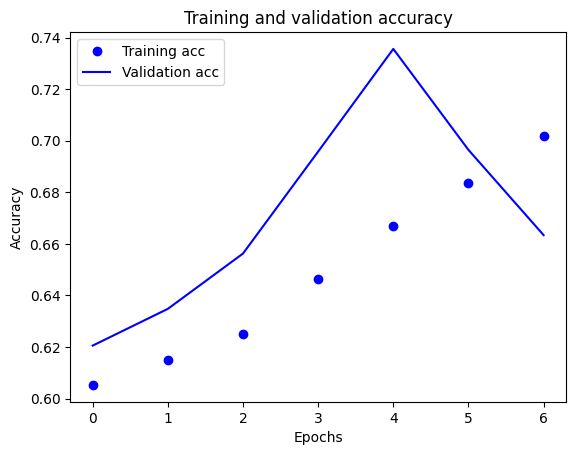

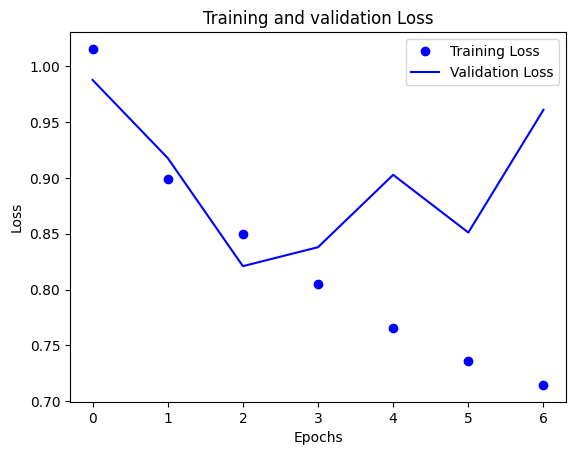

In [28]:
stellar_model(2, 64, "SGD", "sparse_categorical_crossentropy", 7, 16)
# intemediate_layers, layer_units, optimize, loss_function, my_epochs, batch size
# optimizer changed to SGD https://keras.io/api/optimizers/sgd/

Epoch 1/20
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.6528 - loss: 1.0743 - val_accuracy: 0.8727 - val_loss: 0.3231
Epoch 2/20
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8411 - loss: 0.3992 - val_accuracy: 0.9147 - val_loss: 0.3305
Epoch 3/20
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.8922 - loss: 0.2861 - val_accuracy: 0.8902 - val_loss: 0.3488
Epoch 4/20
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - accuracy: 0.9158 - loss: 0.2360 - val_accuracy: 0.9409 - val_loss: 0.2970
Epoch 5/20
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9292 - loss: 0.2062 - val_accuracy: 0.8739 - val_loss: 0.2863
Epoch 6/20
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.9329 - loss: 0.1979 - val_accuracy: 0.9520 - val_loss: 0.1645
Epoch 7/20
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.9368 - loss: 0.1868 - val_accuracy: 0.9562 - val_loss: 0.1536
Epoch 8/20
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9393 - loss: 0.17

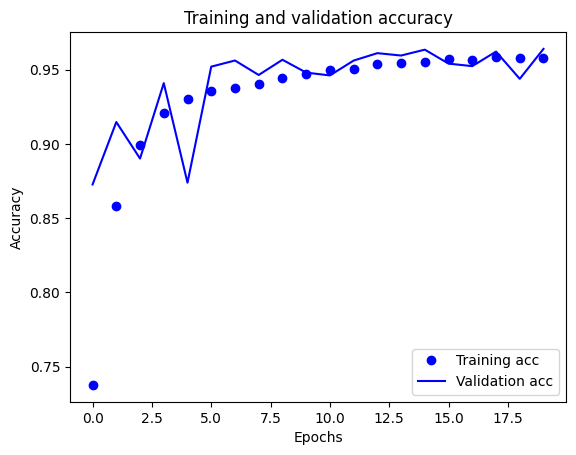

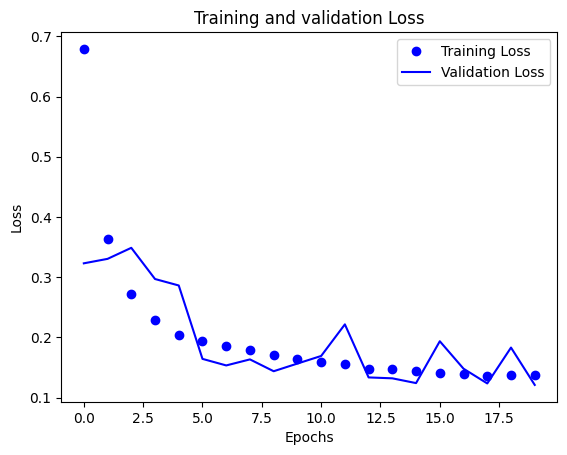

In [42]:
stellar_model(2, 64, "Adam", "sparse_categorical_crossentropy", 20, 16)
# intemediate_layers, layer_units, optimize, loss_function, my_epochs, batch size
# optimizer changed to Adam


Epoch 1/7
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.5443 - loss: 2.0702 - val_accuracy: 0.6526 - val_loss: 0.9638
Epoch 2/7
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.6428 - loss: 0.7977 - val_accuracy: 0.6376 - val_loss: 0.9013
Epoch 3/7
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.6796 - loss: 0.7434 - val_accuracy: 0.7180 - val_loss: 0.8426
Epoch 4/7
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.7127 - loss: 0.7001 - val_accuracy: 0.7559 - val_loss: 0.8128
Epoch 5/7
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.7337 - loss: 0.6727 - val_accuracy: 0.7448 - val_loss: 0.7770
Epoch 6/7
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.7464 - loss: 0.6491 - val_accuracy: 0.7534 - val_loss: 0.7550
Epoch 7/7
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.7543 - loss: 0.6250 - val_accuracy: 0.7555 - val_loss: 0.7352
Highest Validation Accuracy: 0.7559 at Epoch 4
Lowest Validation Loss: 0.7352 at Epoch 7


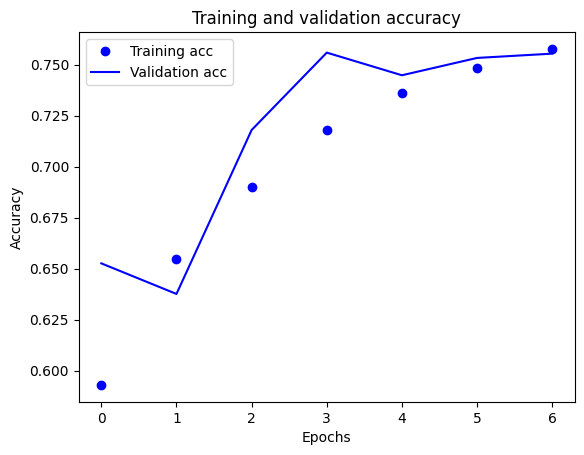

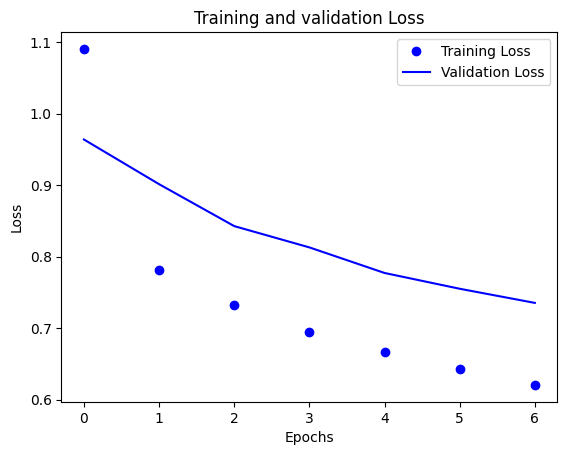

In [43]:
stellar_model(2, 64, "Adagrad", "sparse_categorical_crossentropy", 7, 16)
# intemediate_layers, layer_units, optimize, loss_function, my_epochs, batch size
# optimizer changed to Adagrad

Epoch 1/7
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.1230 - loss: 2.9591 - val_accuracy: 0.0812 - val_loss: 2.8320
Epoch 2/7
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.2212 - loss: 2.9181 - val_accuracy: 0.1481 - val_loss: 2.8315
Epoch 3/7
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.1616 - loss: 2.9018 - val_accuracy: 0.1350 - val_loss: 2.8315
Epoch 4/7
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.1483 - loss: 2.9221 - val_accuracy: 0.1039 - val_loss: 2.8315
Epoch 5/7
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.1506 - loss: 2.9289 - val_accuracy: 0.0807 - val_loss: 2.8315
Epoch 6/7
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.1631 - loss: 2.9205 - val_accuracy: 0.1372 - val_loss: 2.8315
Epoch 7/7
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.1601 - loss: 2.9390 - val_accuracy: 0.2652 - val_loss: 2.8315
Highest Validation Accuracy: 0.2652 at Epoch 7
Lowest Validation Loss: 2.8315 at Epoch 6


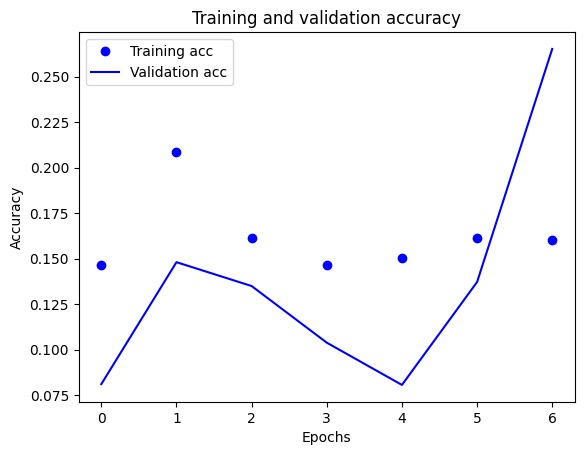

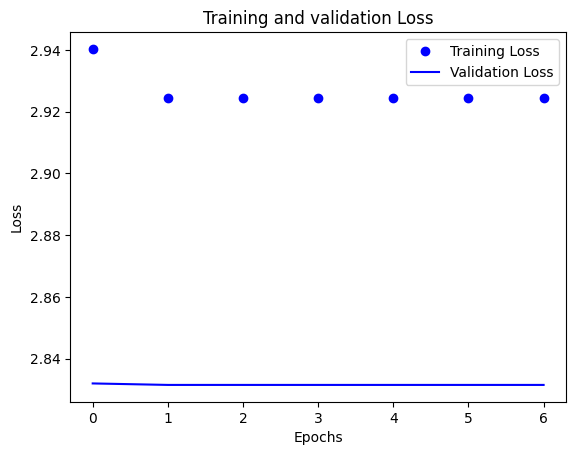

In [30]:
stellar_model(2, 64, "rmsprop", "mean_squared_error", 7, 16)
# intemediate_layers, layer_units, optimize, loss_function, my_epochs, batch size


Epoch 1/7
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.1125 - loss: 20.8492 - val_accuracy: 0.2112 - val_loss: 16.6404
Epoch 2/7
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.1245 - loss: 16.6356 - val_accuracy: 5.0000e-05 - val_loss: 16.6403
Epoch 3/7
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.1223 - loss: 16.6356 - val_accuracy: 1.0000e-04 - val_loss: 16.6403
Epoch 4/7
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.1555 - loss: 16.6356 - val_accuracy: 0.2036 - val_loss: 16.6403
Epoch 5/7
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.1471 - loss: 16.6356 - val_accuracy: 0.2036 - val_loss: 16.6403
Epoch 6/7
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.1565 - loss: 16.6356 - val_accuracy: 1.0000e-04 - val_loss: 16.6403
Epoch 7/7
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.1526 - loss: 16.6356 - val_accuracy: 1.0000e-04 - val_loss: 16.6403
Highest Validation Accuracy: 0.2112 at Epoch 1
Lowest Validation

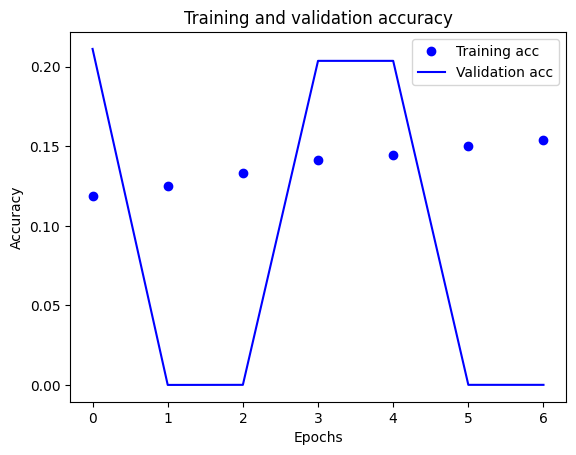

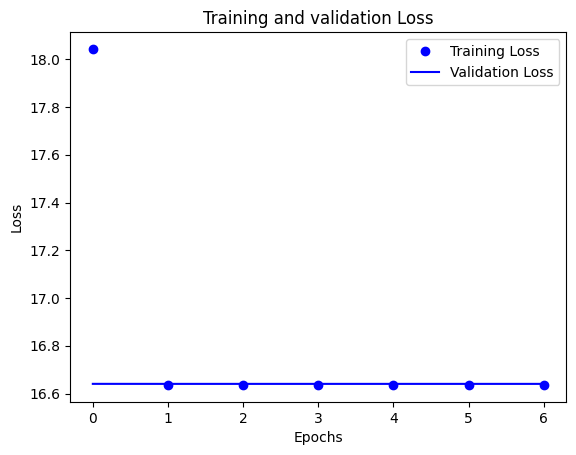

In [31]:
stellar_model(2, 64, "rmsprop", "kld", 7, 16)
# intemediate_layers, layer_units, optimize, loss_function, my_epochs, batch size


Epoch 1/7
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.2175 - loss: 1.4979 - val_accuracy: 0.2035 - val_loss: 1.4782
Epoch 2/7
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.2207 - loss: 1.5046 - val_accuracy: 0.2035 - val_loss: 1.4782
Epoch 3/7
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.2161 - loss: 1.4954 - val_accuracy: 0.2035 - val_loss: 1.4782
Epoch 4/7
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.2187 - loss: 1.5021 - val_accuracy: 0.2035 - val_loss: 1.4782
Epoch 5/7
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.2181 - loss: 1.4993 - val_accuracy: 0.2035 - val_loss: 1.4782
Epoch 6/7
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.2188 - loss: 1.5006 - val_accuracy: 0.2035 - val_loss: 1.4782
Epoch 7/7
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.2204 - loss: 1.5056 - val_accuracy: 0.2035 - val_loss: 1.4782
Highest Validation Accuracy: 0.2035 at Epoch 1
Lowest Validation Loss: 1.4782 at Epoch 1


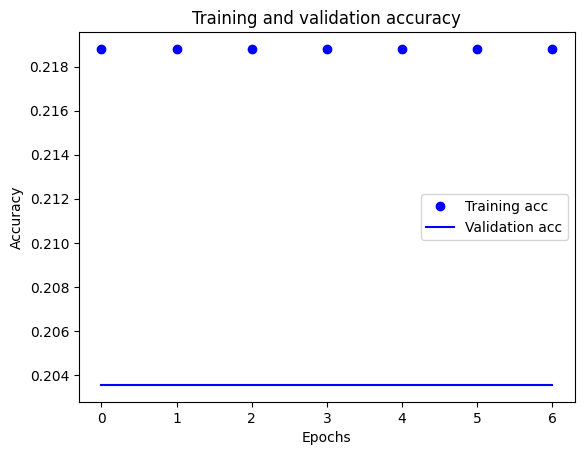

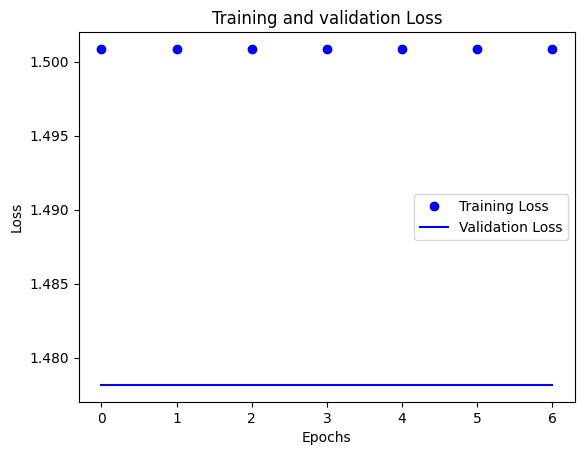

In [32]:
stellar_model(2, 64, "rmsprop", "mean_absolute_error", 7, 16)
# intemediate_layers, layer_units, optimize, loss_function, my_epochs, batch size


Epoch 1/20
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.6016 - loss: 1.5668 - val_accuracy: 0.8420 - val_loss: 0.3653
Epoch 2/20
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.8377 - loss: 0.3966 - val_accuracy: 0.9073 - val_loss: 0.2573
Epoch 3/20
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.8891 - loss: 0.2940 - val_accuracy: 0.8787 - val_loss: 0.4125
Epoch 4/20
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9068 - loss: 0.2599 - val_accuracy: 0.9355 - val_loss: 0.2076
Epoch 5/20
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.9153 - loss: 0.2396 - val_accuracy: 0.9359 - val_loss: 0.1989
Epoch 6/20
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.9228 - loss: 0.2289 - val_accuracy: 0.8971 - val_loss: 0.2284
Epoch 7/20
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9297 - loss: 0.2175 - val_accuracy: 0.9404 - val_loss: 0.1786
Epoch 8/20
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9350 - loss: 0.205

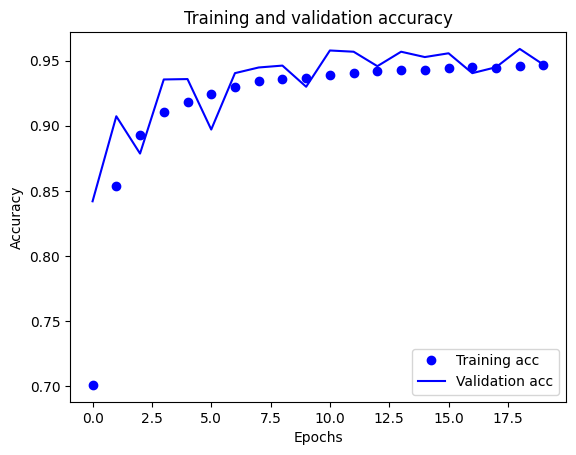

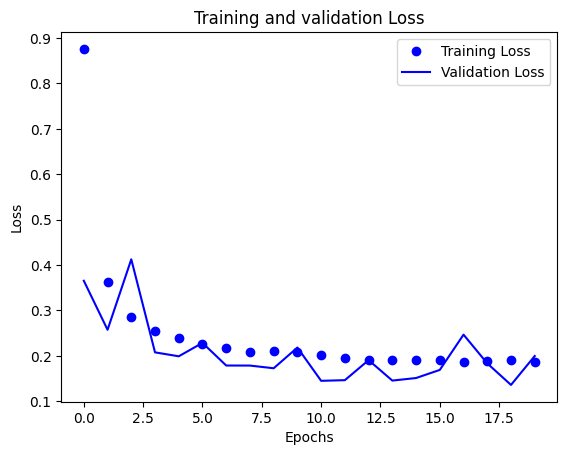

In [44]:
stellar_model(2, 64, "rmsprop", "sparse_categorical_crossentropy", 20, 32)
# intemediate_layers, layer_units, optimize, loss_function, my_epochs, batch size
#batch size of 32

Epoch 1/7
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.5807 - loss: 1.4289 - val_accuracy: 0.8543 - val_loss: 0.3927
Epoch 2/7
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.8327 - loss: 0.4160 - val_accuracy: 0.9165 - val_loss: 0.2603
Epoch 3/7
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.8817 - loss: 0.3059 - val_accuracy: 0.9269 - val_loss: 0.2309
Epoch 4/7
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9060 - loss: 0.2673 - val_accuracy: 0.8899 - val_loss: 0.3229
Epoch 5/7
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9204 - loss: 0.2356 - val_accuracy: 0.9312 - val_loss: 0.2012
Epoch 6/7
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9305 - loss: 0.2165 - val_accuracy: 0.9495 - val_loss: 0.1700
Epoch 7/7
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.9348 - loss: 0.2025 - val_accuracy: 0.9402 - val_loss: 0.1948
Highest Validation Accuracy: 0.9495 at Epoch 6
Lowest Validation Loss: 0.1700 at Epoch 6


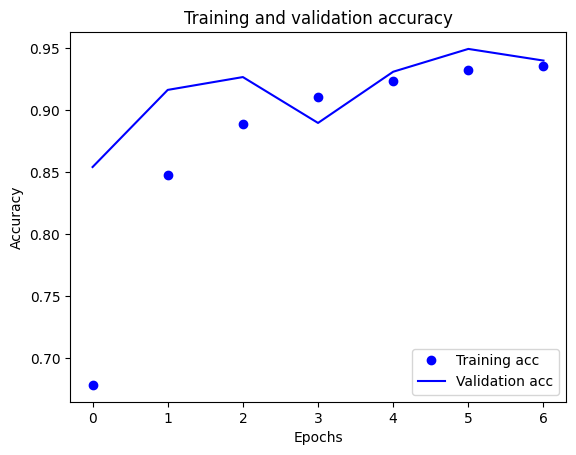

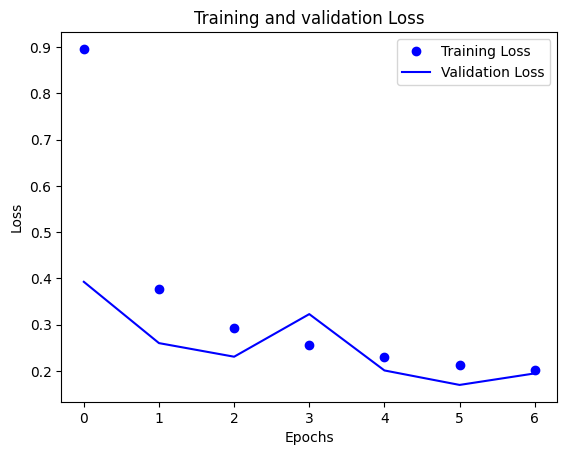

In [34]:
stellar_model(2, 64, "rmsprop", "sparse_categorical_crossentropy", 7, 128)
# intemediate_layers, layer_units, optimize, loss_function, my_epochs, batch size
#batch size of 128

Epoch 1/20
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.5971 - loss: 1.4974 - val_accuracy: 0.8611 - val_loss: 0.3768
Epoch 2/20
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.8460 - loss: 0.3736 - val_accuracy: 0.8909 - val_loss: 0.2703
Epoch 3/20
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.8874 - loss: 0.2946 - val_accuracy: 0.9346 - val_loss: 0.3785
Epoch 4/20
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9075 - loss: 0.2602 - val_accuracy: 0.8530 - val_loss: 0.2901
Epoch 5/20
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9202 - loss: 0.2343 - val_accuracy: 0.9429 - val_loss: 0.1785
Epoch 6/20
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.9281 - loss: 0.2191 - val_accuracy: 0.9398 - val_loss: 0.2060
Epoch 7/20
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9291 - loss: 0.2194 - val_accuracy: 0.9503 - val_loss: 0.1754
Epoch 8/20
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.9336 - loss: 0.2091

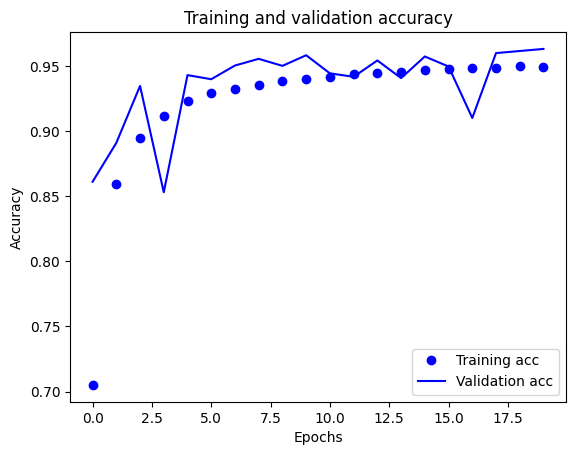

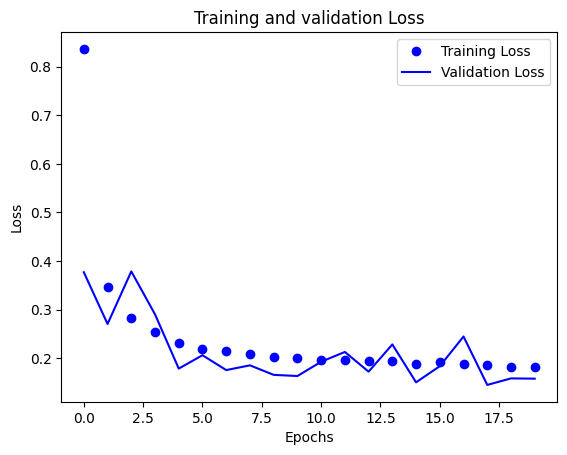

In [45]:
stellar_model(2, 64, "rmsprop", "sparse_categorical_crossentropy", 20, 256)
# intemediate_layers, layer_units, optimize, loss_function, my_epochs, batch size
#batch size of 256

Epoch 1/20
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.6040 - loss: 1.4242 - val_accuracy: 0.7997 - val_loss: 0.4268
Epoch 2/20
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.8427 - loss: 0.3895 - val_accuracy: 0.9114 - val_loss: 0.2655
Epoch 3/20
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8934 - loss: 0.2829 - val_accuracy: 0.9147 - val_loss: 0.2446
Epoch 4/20
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9087 - loss: 0.2557 - val_accuracy: 0.9223 - val_loss: 0.2178
Epoch 5/20
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.9186 - loss: 0.2340 - val_accuracy: 0.8260 - val_loss: 0.3870
Epoch 6/20
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.9278 - loss: 0.2197 - val_accuracy: 0.9433 - val_loss: 0.1748
Epoch 7/20
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9306 - loss: 0.2095 - val_accuracy: 0.9166 - val_loss: 0.2503
Epoch 8/20
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.9368 - loss: 0.2000

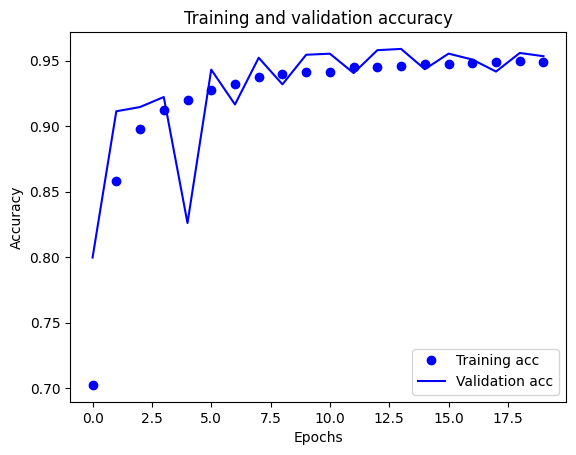

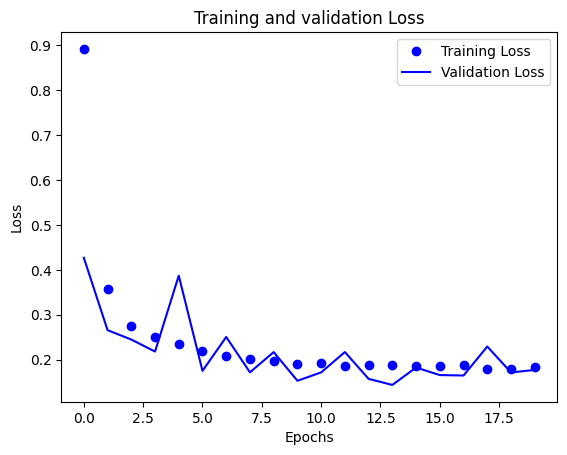

In [46]:
stellar_model(2, 64, "rmsprop", "sparse_categorical_crossentropy", 20, 512)
# intemediate_layers, layer_units, optimize, loss_function, my_epochs, batch size
#batch size of 512

#Best so far

Epoch 1/30
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.6259 - loss: 1.2562 - val_accuracy: 0.8192 - val_loss: 0.4707
Epoch 2/30
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.8545 - loss: 0.3527 - val_accuracy: 0.8498 - val_loss: 0.4627
Epoch 3/30
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.8994 - loss: 0.2707 - val_accuracy: 0.8816 - val_loss: 0.3441
Epoch 4/30
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9141 - loss: 0.2430 - val_accuracy: 0.8813 - val_loss: 0.3536
Epoch 5/30
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.9212 - loss: 0.2314 - val_accuracy: 0.9283 - val_loss: 0.2303
Epoch 6/30
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9263 - loss: 0.2209 - val_accuracy: 0.9298 - val_loss: 0.2128
Epoch 7/30
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.9284 - loss: 0.2149 - val_accuracy: 0.9430 - val_loss: 0.1663
Epoch 8/30
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9319 - loss: 0.2078 

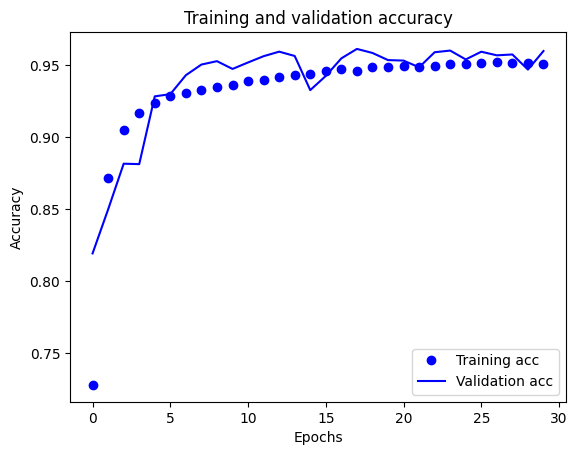

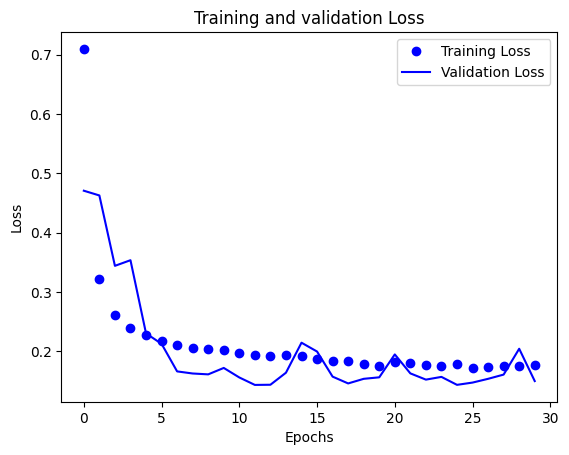

In [47]:
#64 unit Layers
stellar_model(2, 64, "rmsprop", "sparse_categorical_crossentropy", 30, 16)
# intemediate_layers, layer_units, optimize, loss_function, my_epochs, batch size

Epoch 1/20
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.5742 - loss: 1.6124 - val_accuracy: 0.7854 - val_loss: 0.5894
Epoch 2/20
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8277 - loss: 0.4126 - val_accuracy: 0.9143 - val_loss: 0.5730
Epoch 3/20
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.8719 - loss: 0.3259 - val_accuracy: 0.9119 - val_loss: 0.6475
Epoch 4/20
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.8957 - loss: 0.2866 - val_accuracy: 0.9306 - val_loss: 0.6205
Epoch 5/20
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9134 - loss: 0.2459 - val_accuracy: 0.9365 - val_loss: 0.2143
Epoch 6/20
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9201 - loss: 0.2411 - val_accuracy: 0.9546 - val_loss: 0.1664
Epoch 7/20
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.9283 - loss: 0.2195 - val_accuracy: 0.8115 - val_loss: 0.5495
Epoch 8/20
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.9333 - loss: 0.207

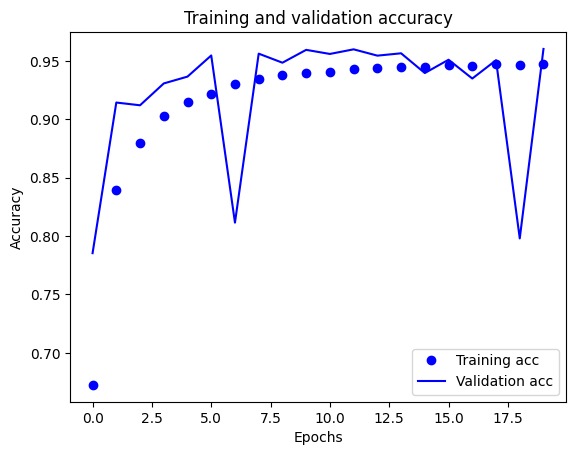

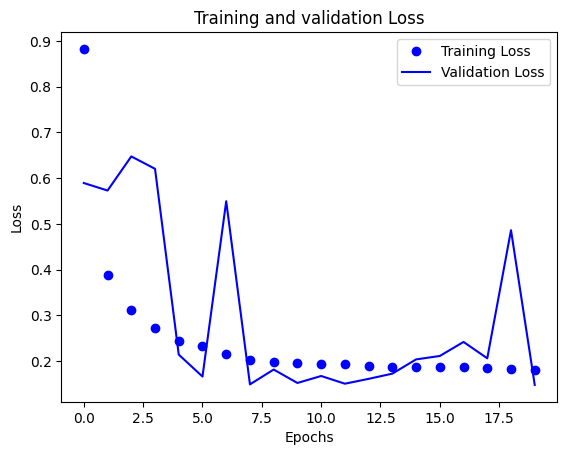

In [38]:
stellar_model(2, 32, "rmsprop", "sparse_categorical_crossentropy", 20, 16)

Epoch 1/30
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.5469 - loss: 1.6409 - val_accuracy: 0.7916 - val_loss: 0.7390
Epoch 2/30
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.7987 - loss: 0.4787 - val_accuracy: 0.9187 - val_loss: 0.5996
Epoch 3/30
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.8635 - loss: 0.3404 - val_accuracy: 0.8978 - val_loss: 0.6001
Epoch 4/30
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.8921 - loss: 0.2919 - val_accuracy: 0.9450 - val_loss: 0.5372
Epoch 5/30
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.9044 - loss: 0.2612 - val_accuracy: 0.8511 - val_loss: 0.8811
Epoch 6/30
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9141 - loss: 0.2459 - val_accuracy: 0.9500 - val_loss: 0.7628
Epoch 7/30
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.9199 - loss: 0.2346 - val_accuracy: 0.9545 - val_loss: 0.7507
Epoch 8/30
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.9244 - loss: 0.227

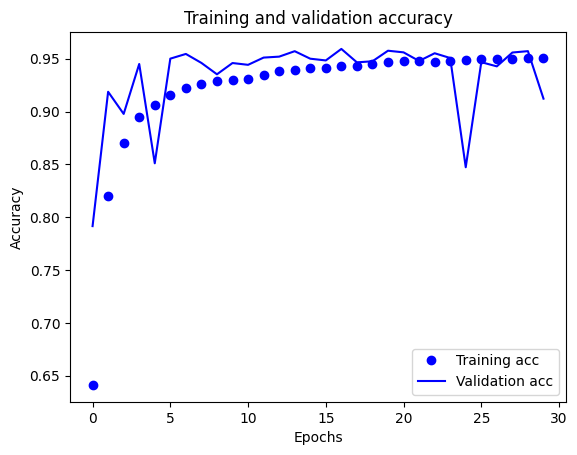

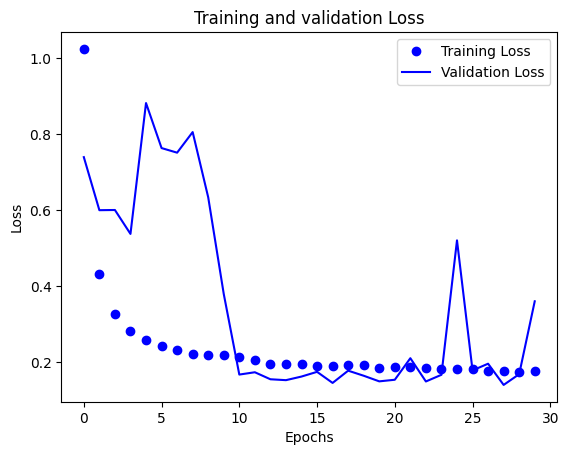

In [39]:
stellar_model(2, 32, "rmsprop", "sparse_categorical_crossentropy", 30, 16)